In [1]:
import torch
from PIL import Image
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
import timm
import argparse
import yaml
import sys

sys.path.append("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Libs")
import RS_dataset
import RS_models
import RS_utils

import map_dataset

import rasterio
import numpy as np 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
from torch.nn.utils.rnn import pad_sequence
import torchvision.transforms.functional as F


/mnt/hdd/eric/.conda/envs/mapv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [2]:
#--- argparser
parser = argparse.ArgumentParser()
parser.add_argument('--cfg', type=str, default='/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/07.Challenge/01.MapYourCity_HuggingFace/configs/finetune_4.yaml')
args = parser.parse_args([])
cfg = argparse.Namespace(**yaml.load(open(args.cfg), Loader=yaml.SafeLoader))

In [3]:
input_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Map_Your_City/building-age-dataset/"
train_path = input_path + "train/data/"
test_path = input_path + "test/data/"
train_df = pd.read_csv(input_path + "train/train-set.csv")
test_df = pd.read_csv(input_path + "test/test-set.csv") 

In [4]:
#--- data split 
names_data = os.listdir(train_path)
# if cfg.SAMPLE:
#     parse_idx = int(len(names_data) * 0.01)
#     names_data = names_data[:parse_idx]
names_train, names_valid = train_test_split(names_data, test_size=0.1, random_state=1)

In [5]:
# 814 , 804 번 index 예외 나왔다. 혼자 사이즈 다름. 38

61
label :  4
(3, 376, 376)


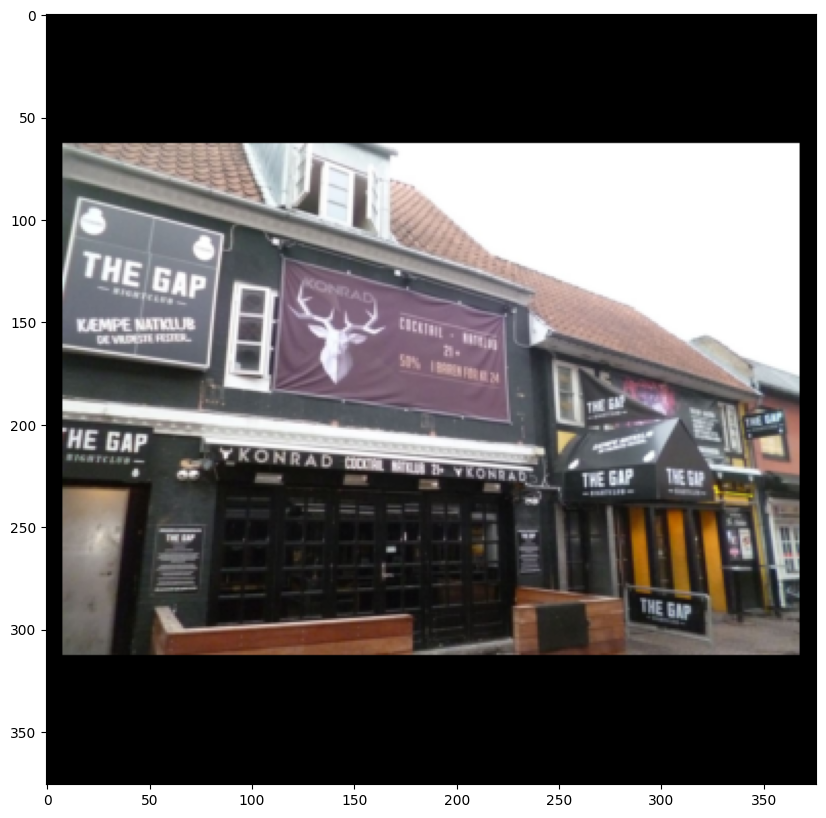

In [6]:
# width : height = 2 : 3 = 1000 : 1500
# 256 : 375

import albumentations as A

train_set = map_dataset.Map_Dataset_v3(names_train, train_path, 376, cfg  ) 
test_set = map_dataset.Map_Dataset_v3(names_valid, train_path, 376, cfg  )  

import random
qq = random.randint(0,999)
qq = 61
print(qq)
aa = train_set.__getitem__(qq)[0]
aa_label = train_set.__getitem__(qq)[1]
bb = test_set.__getitem__(qq)[0]
aa = np.asarray(aa)
bb = np.asarray(bb)

print("label : ", aa_label)
print(aa.shape)
#print(bb.shape)
#plt.imshow(aa)

aa = torch.Tensor(aa)
RS_utils.torch_display(aa,False,denormal=True)


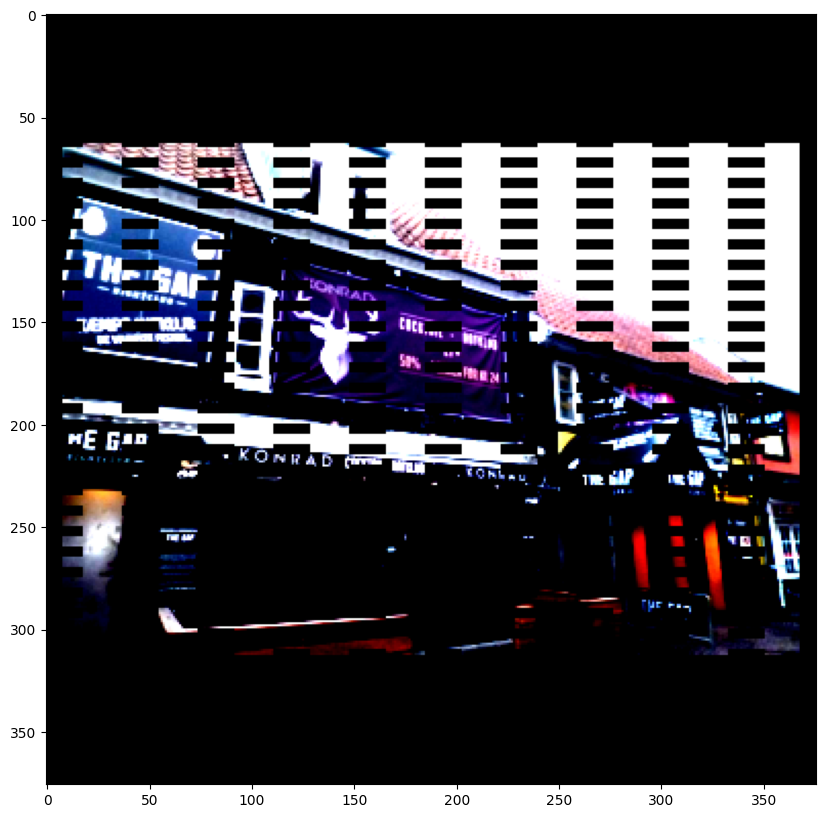

In [7]:
# albumentations as A 
aa = train_set.__getitem__(qq)[0]
aa_label = train_set.__getitem__(qq)[1]

aa = aa.permute(1,2,0)
aa = np.asarray(aa)

image = aa

transform_grid= A.GridDropout(p=1.0)
transformed_grid = transform_grid(image=image)

transform_grid2= A.GridDropout(p=1.0,holes_number_x=4,holes_number_y=4)
transformed_grid2 = transform_grid2(image=image)

trans_img = transformed_grid['image']
plt.figure(figsize=(10,10))
plt.imshow(trans_img)
# plot([transformed_grid['image'],transformed_grid2['image']],col_title=["Grid dropout","Less blocks"])


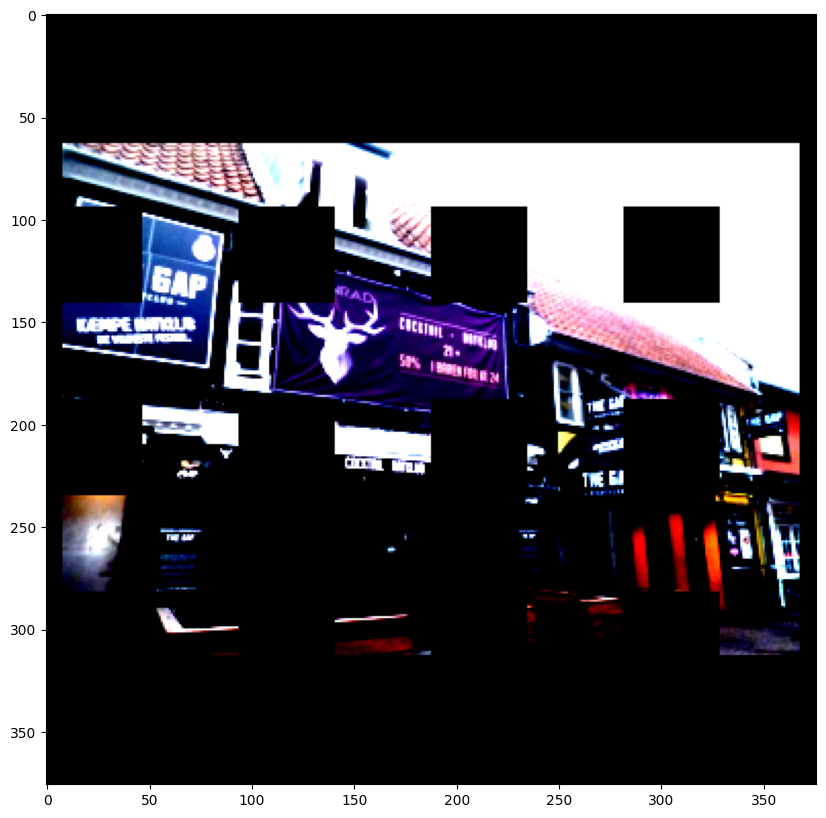

In [8]:
trans_img = transformed_grid2['image']
plt.figure(figsize=(10,10))
plt.imshow(trans_img)

61
label :  4
(3, 376, 376)


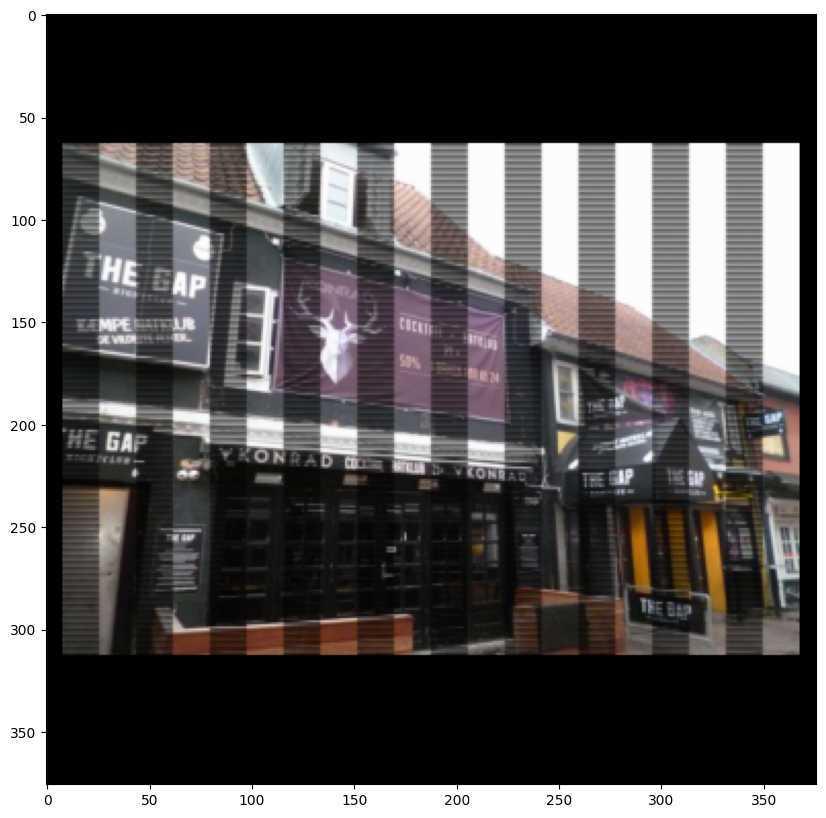

In [24]:
#--- dataset v4 test

train_set = map_dataset.Map_Dataset_v4(names_train, train_path, 376, cfg  ) 

import random
qq = random.randint(0,999)
qq = 61
print(qq)
aa = train_set.__getitem__(qq)[0]
aa_label = train_set.__getitem__(qq)[1]
bb = test_set.__getitem__(qq)[0]
aa = np.asarray(aa)
bb = np.asarray(bb)

print("label : ", aa_label)
print(aa.shape)
#print(bb.shape)
#plt.imshow(aa)

aa = torch.Tensor(aa)
RS_utils.torch_display(aa,False,denormal=True)


In [1]:
from wand.image import Image

In [2]:
file_ = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/images/1a0cd14cd.png"
from __future__ import print_function
from wand.image import Image as image

with image(filename=file_) as img:
    print('width =', img.width)
    print('height =', img.height)

width = 768
height = 648


In [14]:
import numpy as np
from wand.image import Image as image
from PIL import Image

img = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/images/1a0cd14cd.png"


def convrt_(file_):
    new_image_size = 224
    with image(filename=file_) as src:
        src.resize( new_image_size, new_image_size, filter="robidouxsharp" )

    return Image.fromarray(np.array(src))

In [15]:
result = convrt_(img)

TypeError: Cannot handle this data type: (1, 1), |O

In [ ]:
res

In [10]:
src

ClosedImageError: <wand.image.Image: (closed)> is closed already

<wand.image.Image: (closed)>

In [4]:
from PIL import Image
src  =Image.fromarray(np.array(src))

TypeError: Cannot handle this data type: (1, 1), |O

()


TypeError: Image data of dtype object cannot be converted to float

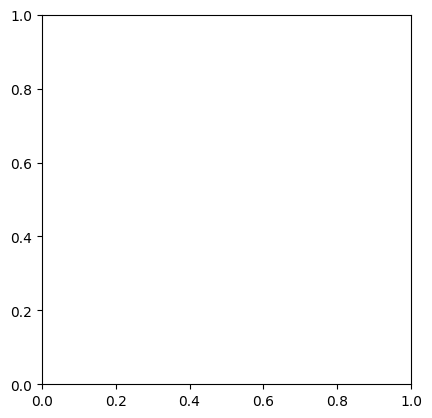

In [20]:
import matplotlib.pyplot as plt 

plt.imshow(np_src)